# **Credit Card Classification**

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report,roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV




## **EXPLORING THE DATA**

In [2]:
# Loading the data
df = pd.read_csv("/content/Credit_card.csv")
df_labels= pd.read_csv("/content/Credit_card_label.csv")

In [3]:
# Displaying the first few rows of the dataset
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [4]:
# Displaying the column names
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')

In [5]:
# Displaying information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [6]:
df.shape

(1548, 18)

In [7]:
# Checking for duplicated rows
df.duplicated().sum()

0

In [8]:
# Checking for missing values
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [9]:
# Descriptive statistics of numeric columns after dropping "Ind_ID"
df.drop("Ind_ID",axis=1).loc[:,:].describe().T.sort_values(by='std' , ascending = False)

,count,mean,std,min,25%,50%,75%,max
Employed_days,1548.0,59364.689922,137808.062701,-14887.0,-3174.5,-1565.0,-431.75,365243.0
Annual_income,1525.0,191399.326230,113252.997656,33750.0,121500.0,166500.0,225000.00,1575000.0
Birthday_count,1526.0,-16040.342071,4229.503202,-24946.0,-19553.0,-15661.5,-12417.00,-7705.0
Family_Members,1548.0,2.161499,0.947772,1.0,2.0,2.0,3.00,15.0
CHILDREN,1548.0,0.412791,0.776691,0.0,0.0,0.0,1.00,14.0
Phone,1548.0,0.309432,0.462409,0.0,0.0,0.0,1.00,1.0
Work_Phone,1548.0,0.208010,0.406015,0.0,0.0,0.0,0.00,1.0
EMAIL_ID,1548.0,0.092377,0.289651,0.0,0.0,0.0,0.00,1.0
Mobile_phone,1548.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0


In [10]:
# Combining the data with labels and dropping "Ind_ID"
df = pd.concat([df,df_labels],axis=1).drop("Ind_ID",axis=1)

In [11]:
df.head(5)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


<Axes: xlabel='None'>

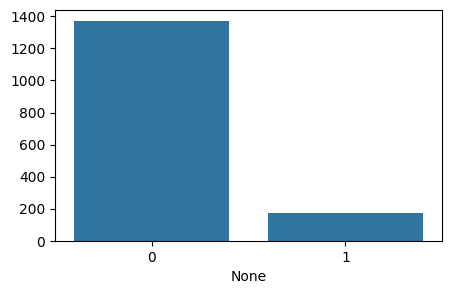

In [12]:
# Plotting bar chart for approval labels
plt.figure(figsize=(5, 3))
sns.barplot(x=df_labels.label.value_counts().index,y=df_labels.label.value_counts().values)

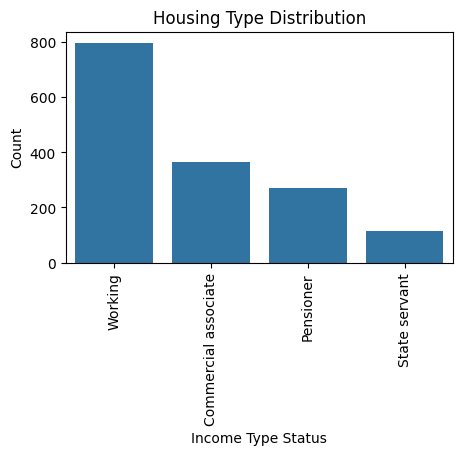

In [13]:
plt.figure(figsize=(5, 3))
sns.barplot(x=df.Type_Income.value_counts().index,y=df.Type_Income.value_counts().values)
plt.xlabel('Income Type Status')
plt.ylabel('Count')
plt.title('Housing Type Distribution')
plt.xticks(rotation=90)
plt.show()

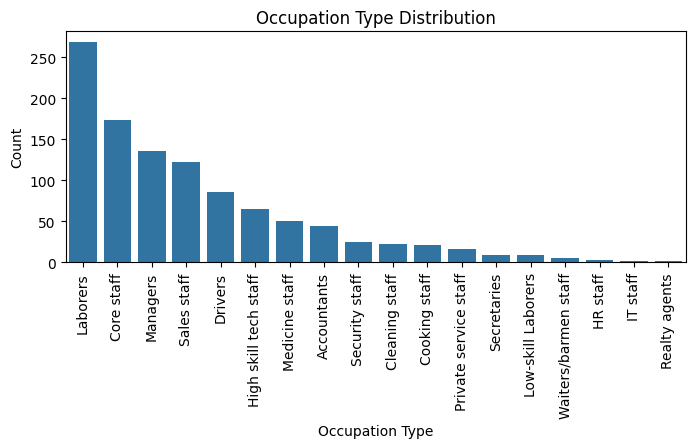

In [14]:
plt.figure(figsize=(8, 3))
sns.barplot(x=df.Type_Occupation.value_counts().index,y=df.Type_Occupation.value_counts().values)
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Occupation Type Distribution')
plt.xticks(rotation=90)
plt.show()

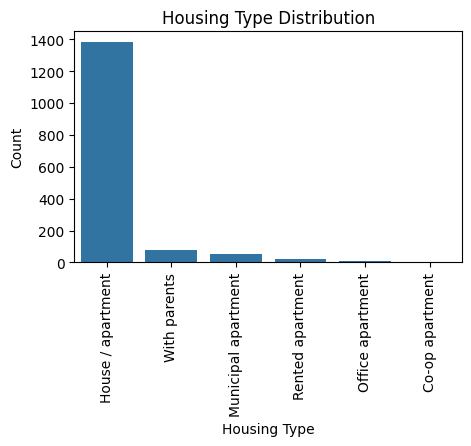

In [15]:
plt.figure(figsize=(5, 3))
sns.barplot(x=df.Housing_type.value_counts().index,y=df.Housing_type.value_counts().values)
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.title('Housing Type Distribution')
plt.xticks(rotation=90)
plt.show()

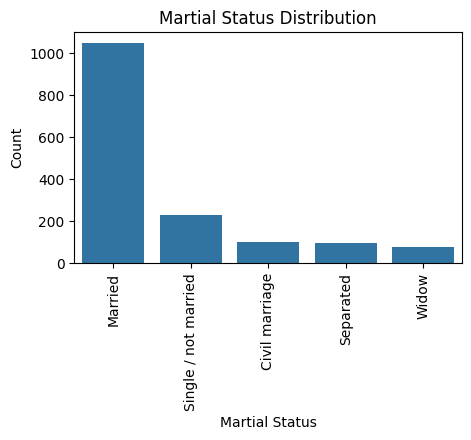

In [16]:
plt.figure(figsize=(5, 3))
sns.barplot(x=df.Marital_status.value_counts().index,y=df.Marital_status.value_counts().values)
plt.xlabel('Martial Status')
plt.ylabel('Count')
plt.title('Martial Status Distribution')
plt.xticks(rotation=90)
plt.show()

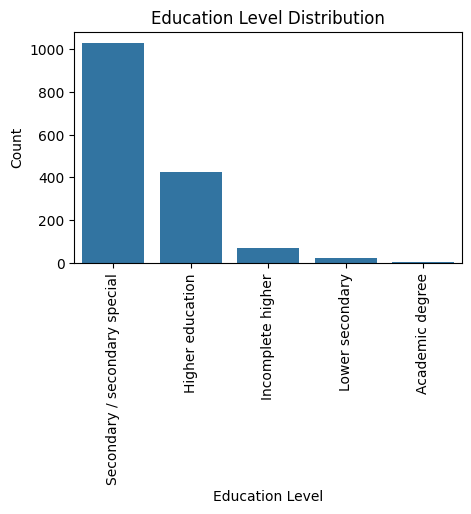

In [17]:
plt.figure(figsize=(5, 3))
sns.barplot(x=df.EDUCATION.value_counts().index,y=df.EDUCATION.value_counts().values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.xticks(rotation=90)
plt.show()

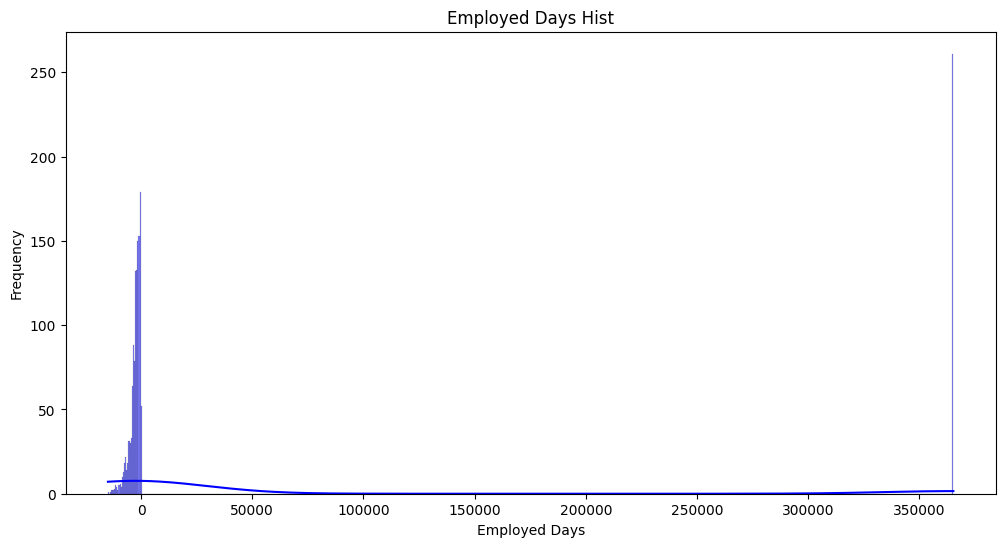

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Employed_days'], color='blue', kde=True)
plt.xlabel('Employed Days')
plt.ylabel('Frequency')
plt.title('Employed Days Hist')
plt.show()

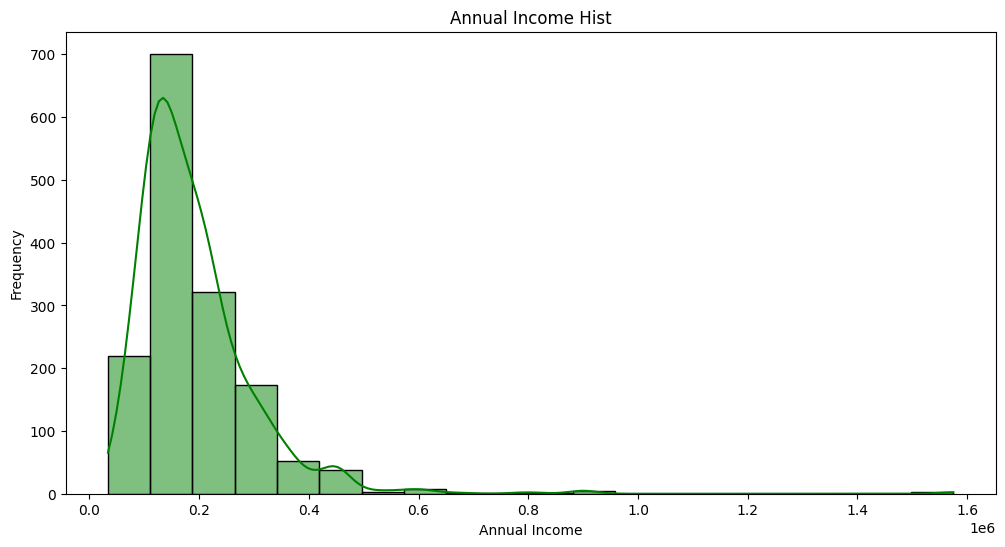

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Annual_income'], bins=20, color='GREEN', kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Annual Income Hist')
plt.show()

# **Data preprocessing**

In [20]:
# Data preprocessing function
def preprocessing_data(df,engineering_LogTransform = False):

    # Filling NallValues with mode
    nan_columns_mod = ["GENDER","Type_Occupation"]
    for i in nan_columns_mod:
        mode_col = df[i].mode()[0]
        df[i].fillna(mode_col, inplace=True)

    # Filling NallValues with mean
    nan_columns_mean = ["Annual_income","Birthday_count"]
    for i in nan_columns_mean:
        mean_col = df[i].mean()
        df[i].fillna(mean_col, inplace=True)

    # Outlier clear
    numeric_columns = ["Annual_income", "Birthday_count", "Employed_days"]
    for col in numeric_columns:
        mean_ = df[col].mean()
        std_ = df[col].std()
        threshold_ = 1.96
        df = df[(df[col] >= (mean_ - threshold_ * std_)) &
                (df[col] <= (mean_ + threshold_ * std_))]

    # Data Binary Encoding
    binary_columns = ["GENDER","Car_Owner","Propert_Owner"]

    for col in binary_columns:
        if not "GENDER" == col:
            df[col] = df[col].replace({"Y":1,"N":0})
        else:
            df[col] = df[col].replace({"M":1,"F":0})

    # One-Hot Encoding
    for column in ['Type_Income', 'Type_Occupation', 'Housing_type', 'Marital_status', 'EDUCATION']:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1).reset_index(drop=True)

    # Birthday
    df["Age"] = df["Birthday_count"].apply(lambda x : abs(int(x))/365)
    df = df.drop("Birthday_count", axis=1)

    # Train-test split
    X = df.drop("label",axis=1)
    y = df["label"]

    #Oversampling
    X_over,y_over=RandomOverSampler().fit_resample(X,y)

    X_train, X_test, y_train, y_test = train_test_split(X_over, y_over,stratify=y_over, random_state=3)

    if engineering_LogTransform:

        X_train["Employed_days"] = np.log(X_train["Employed_days"].abs())
        X_test["Employed_days"] = np.log(X_test["Employed_days"].abs())

        X_train['Annual_income'] = X_train['Annual_income'].apply(lambda x: x ** 0.5)
        X_test['Annual_income'] = X_test['Annual_income'].apply(lambda x: x ** 0.5)

    else:
        scaler = StandardScaler()

        features = ['Employed_days', 'Annual_income']
        X_train[features] = scaler.fit_transform(X_train[features])
        X_test[features] = scaler.transform(X_test[features])

    return X_train, X_test, y_train, y_test


In [21]:
# Applying data preprocessing
X_train, X_test, y_train, y_test = preprocessing_data(df,engineering_LogTransform = True)

In [22]:
X_train.head(5)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,EDUCATION_Academic degree,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special,Age
1531,0,0,0,0,367.423461,6.369901,1,0,0,0,...,0,0,0,1,0,0,0,0,1,54.827397
2058,0,0,1,0,450.000000,8.137396,1,0,0,0,...,1,0,0,0,0,0,0,0,1,39.789041
244,0,0,0,0,519.615242,7.449498,1,1,1,0,...,1,0,0,0,0,0,0,0,1,48.706849
1165,0,1,1,2,424.264069,7.960673,1,0,1,1,...,1,0,0,0,0,1,0,0,0,32.106849
22,0,1,0,1,367.423461,5.950643,1,1,0,0,...,1,0,0,0,0,0,0,0,1,43.704110


In [23]:
# Displaying information about the preprocessed dataset
print(X_train.shape[0])
print(X_test.shape[0])

1663
555


In [24]:
X_train["Age"].max()

64.96164383561644

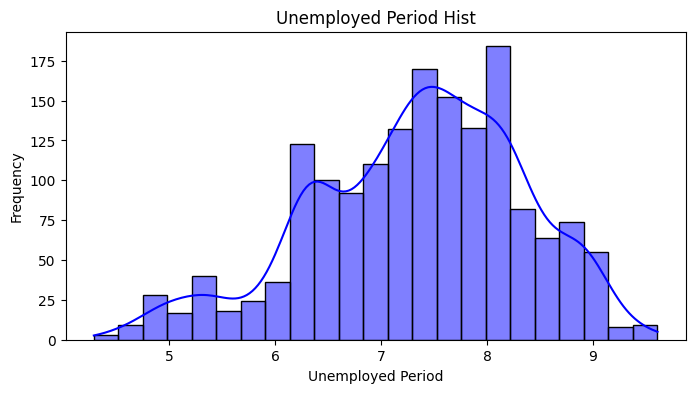

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(X_train['Employed_days'], color='blue', kde=True)
plt.xlabel('Unemployed Period')
plt.ylabel('Frequency')
plt.title('Unemployed Period Hist')
plt.show()

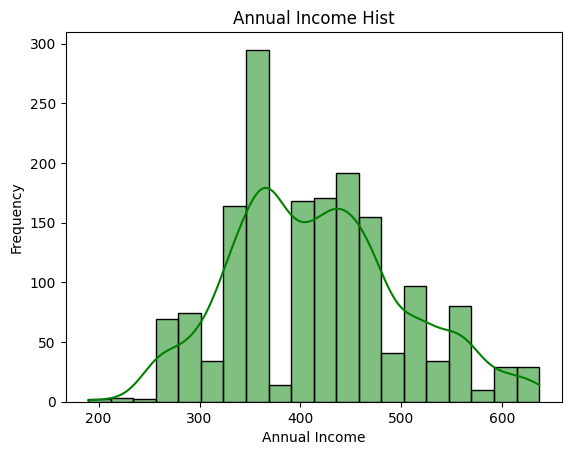

In [26]:
sns.histplot(X_train['Annual_income'], bins=20, color='GREEN', kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Annual Income Hist')
plt.show()

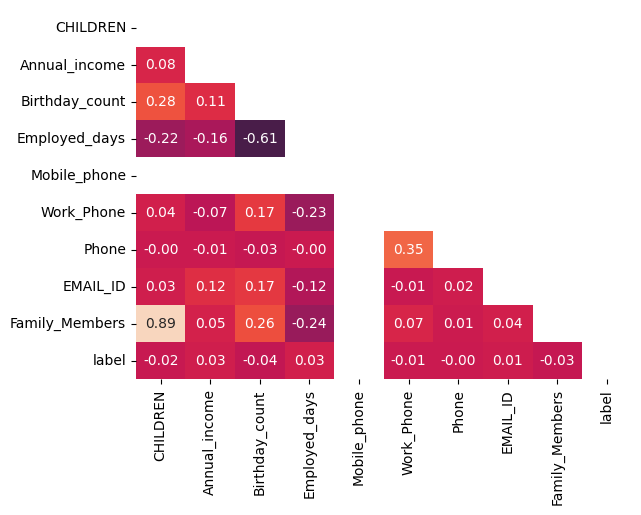

In [27]:
corr_matrix=df.select_dtypes(np.number).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, vmin=-1, vmax=1, fmt=".2f", cbar=False)

plt.show()

# **Machine Learning**

In [28]:
# Machine Learning Section

# Models: Logistic Regression, Random Forest, Gradient Boosting, K-Nearest Neighbors
# Evaluation metrics: Accuracy, ROC AUC, F1 Score, Classification Report

# Model 1: Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Model 2: Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Model 3: Gradient Boosting
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

# Model 4: K-Nearest Neighbors
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

# Evaluating models
models = [model_lr, model_rf, model_gb, model_knn]
for idx, model in enumerate(models, start=1):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    f1 = f1_score(y_test, y_pred)


    print(f'Model {idx}: {type(model).__name__}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'ROC AUC: {roc_auc:.2f}')
    print(f'f1 score',f1 )
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print('-' * 50)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model 1: LogisticRegression
Accuracy: 0.62
ROC AUC: 0.69
f1 score 0.5954198473282443
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.67      0.64       278
           1       0.63      0.56      0.60       277

    accuracy                           0.62       555
   macro avg       0.62      0.62      0.62       555
weighted avg       0.62      0.62      0.62       555

--------------------------------------------------
Model 2: RandomForestClassifier
Accuracy: 0.99
ROC AUC: 0.99
f1 score 0.9875222816399286
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       278
           1       0.98      1.00      0.99       277

    accuracy                           0.99       555
   macro avg       0.99      0.99      0.99       555
weighted avg       0.99      0.99      0.99       555

--------------------------------------------------
Model 3: GradientBoost

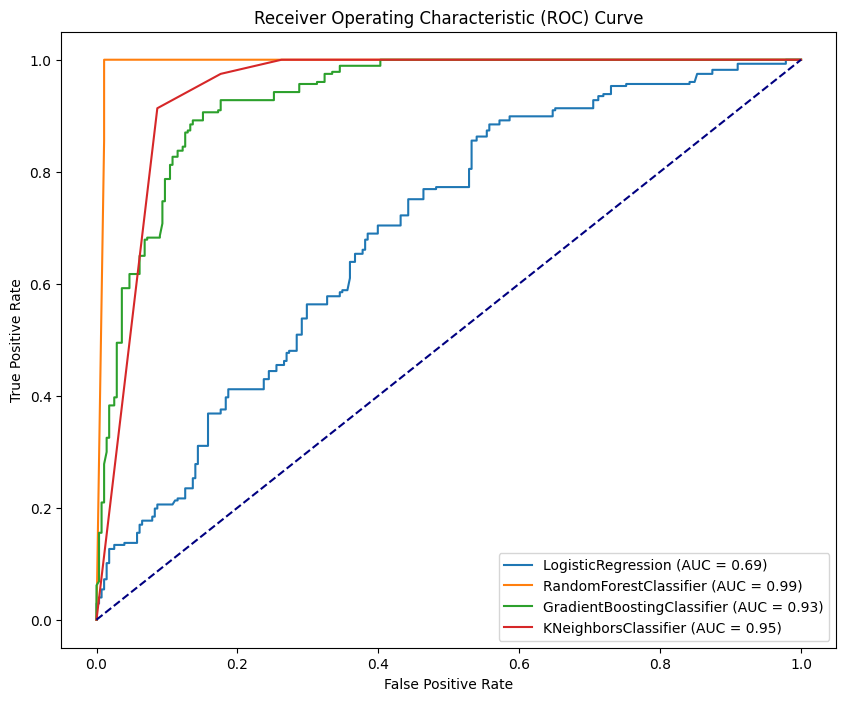

In [29]:
# Visualize ROC curve for model comparison
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for model in models:
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
# Perform hyperparameter tuning

rf_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1,5],
    'max_features': ['auto', 'sqrt', 'log2']
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)

# Grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=kf, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_estimator = grid_search.best_estimator_

In [31]:
y_pred = best_estimator.predict(X_test)

## Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       278
           1       0.98      1.00      0.99       277

    accuracy                           0.99       555
   macro avg       0.99      0.99      0.99       555
weighted avg       0.99      0.99      0.99       555

Best Estimator: RandomForestClassifier()
Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score: 0.9952238273026547
Test F1 Score: 0.9875222816399286


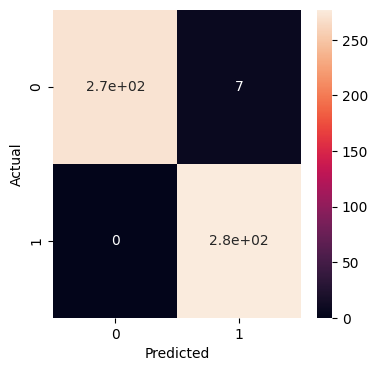

In [32]:
confusion=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test,y_pred))
print("Best Estimator:", grid_search.best_estimator_)
print("Best Params:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
print("Test F1 Score:", f1_score(y_test, y_pred))

## ROC AUC Curve

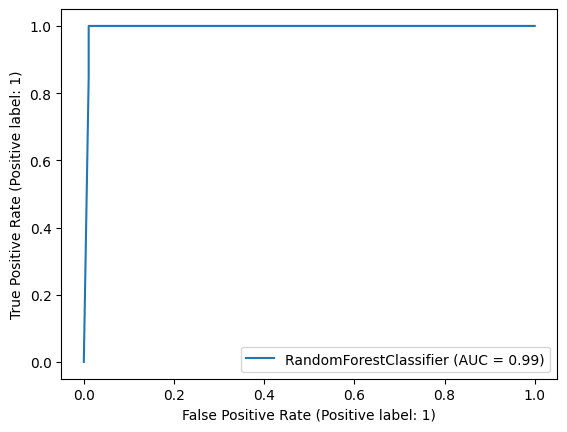

In [33]:
RocCurveDisplay.from_estimator(best_estimator, X_test, y_test)

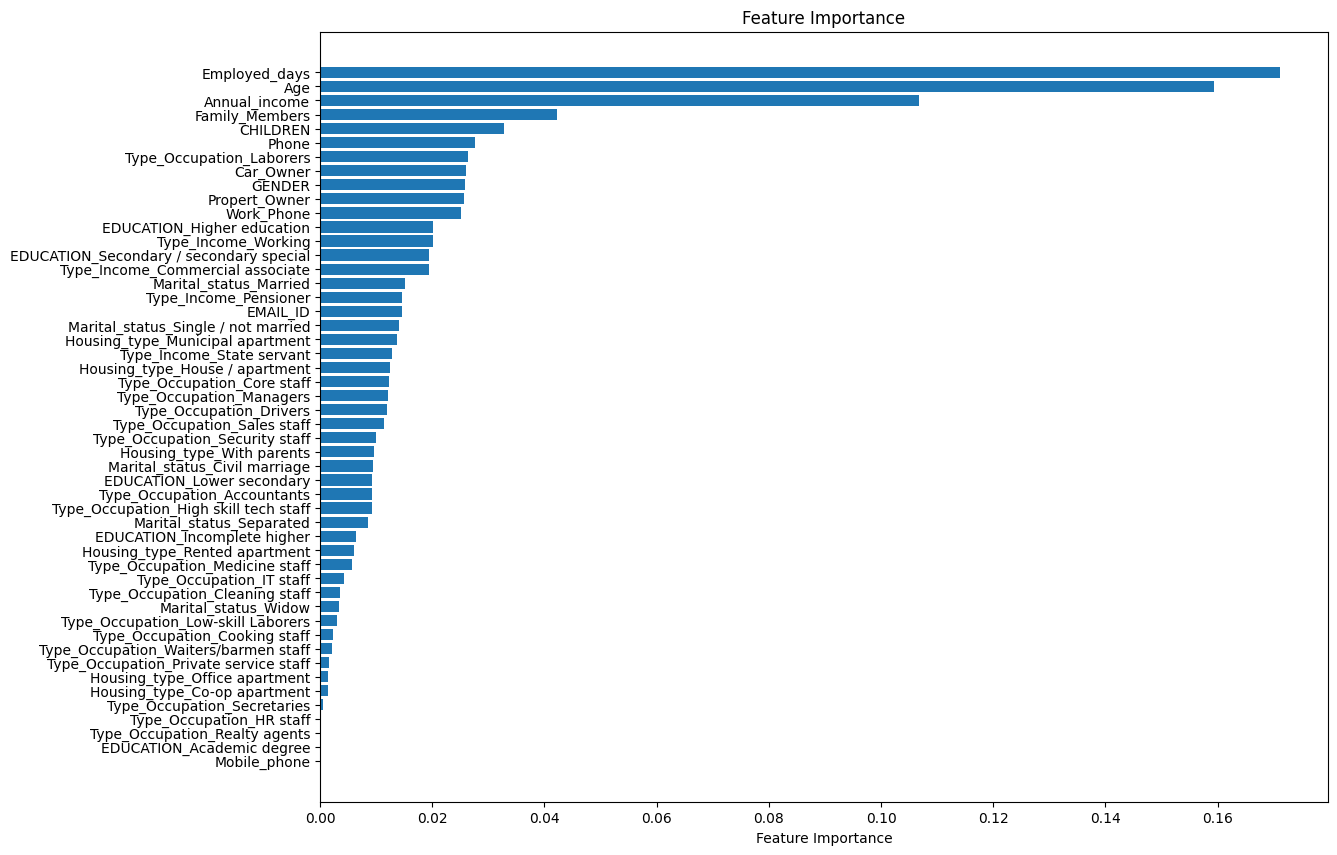

In [34]:
# Feature Importance Plot
feature_importance = best_estimator.feature_importances_

sorted_idx = feature_importance.argsort()[::-1]

plt.figure(figsize=(13, 10))
plt.barh(range(X_train.shape[1]), feature_importance[sorted_idx])
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()
